In [11]:
import pandas as pd
df = pd.read_csv("dataset/train.csv")
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [12]:
df.columns


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [14]:
df.isnull().sum()


Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [15]:
df.drop(columns=['Postal Code'], inplace=True)



In [16]:
df.isnull().sum()


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [17]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')


In [18]:
df[['Order Date', 'Ship Date']].head()


,Order Date,Ship Date
0,2017-08-11,2017-11-11
1,2017-08-11,2017-11-11
2,2017-12-06,NaT
3,2016-11-10,NaT
4,2016-11-10,NaT


In [19]:
df.isnull().sum()


Row ID              0
Order ID            0
Order Date       5841
Ship Date        5985
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Country             0
City                0
State               0
Region              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
dtype: int64

In [24]:
df.loc[df['Order Date'].isna(), 'Order Date'].head()


12   NaT
14   NaT
15   NaT
17   NaT
18   NaT
Name: Order Date, dtype: datetime64[ns]

In [25]:
df['Order Date'] = pd.to_datetime(
    df['Order Date'],
    errors='coerce'
)

df['Ship Date'] = pd.to_datetime(
    df['Ship Date'],
    errors='coerce'
)


In [26]:
df.isnull().sum()


Row ID              0
Order ID            0
Order Date       5841
Ship Date        5985
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Country             0
City                0
State               0
Region              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
dtype: int64

In [27]:
total_rows = len(df)
order_missing_pct = df['Order Date'].isna().mean() * 100
ship_missing_pct = df['Ship Date'].isna().mean() * 100

total_rows, order_missing_pct, ship_missing_pct


(9800, 59.60204081632653, 61.07142857142858)

Approximately 59% of Order Date and 61% of Ship Date values are missing in the dataset.
Dropping or imputing these values would lead to significant data loss or introduce bias.
Therefore, time-based analysis is restricted to records with valid dates, while overall sales and category-level analysis uses the complete dataset.

In [28]:
df_time = df.dropna(subset=['Order Date']).copy()


In [29]:
df_time['Order_Year'] = df_time['Order Date'].dt.year
df_time['Order_Month'] = df_time['Order Date'].dt.month
df_time['Order_Month_Name'] = df_time['Order Date'].dt.month_name()


In [30]:
import matplotlib.pyplot as plt

category_sales = (
    df.groupby('Category')['Sales']
    .sum()
    .sort_values(ascending=False)
)

category_sales


Category
Technology         827455.8730
Furniture          728658.5757
Office Supplies    705422.3340
Name: Sales, dtype: float64

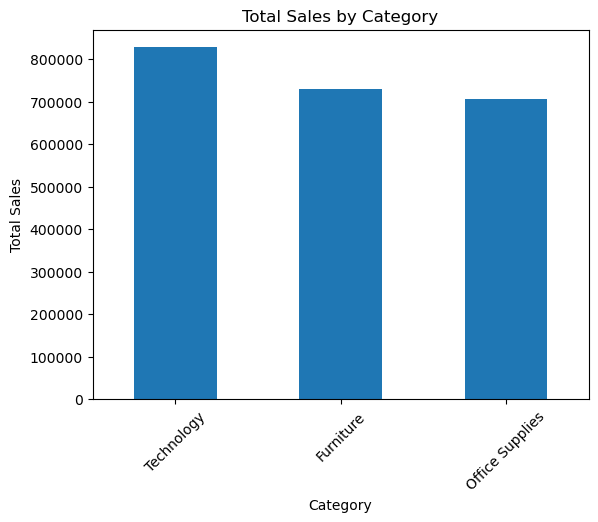

In [31]:
category_sales.plot(kind='bar')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


The Technology category generates the highest total sales, followed by Furniture and Office Supplies.
This indicates that technology products are the primary revenue driver and should be a key focus area for the business.

In [32]:
subcat_sales = (
    df.groupby('Sub-Category')['Sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

subcat_sales


Sub-Category
Phones         327782.4480
Chairs         322822.7310
Storage        219343.3920
Tables         202810.6280
Binders        200028.7850
Machines       189238.6310
Accessories    164186.7000
Copiers        146248.0940
Bookcases      113813.1987
Appliances     104618.4030
Name: Sales, dtype: float64

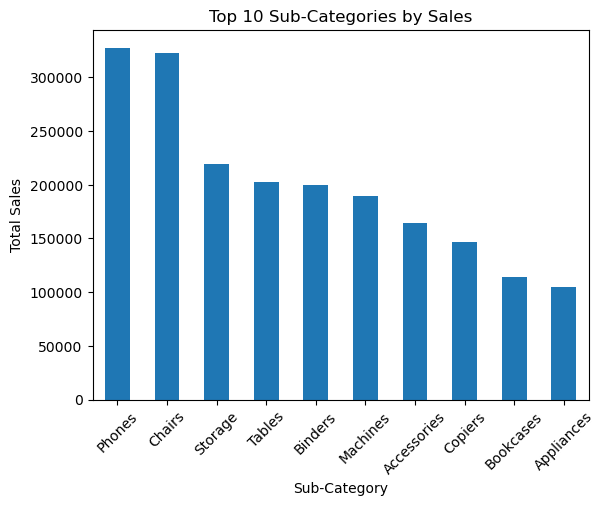

In [33]:
subcat_sales.plot(kind='bar')
plt.title('Top 10 Sub-Categories by Sales')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


Phones and Chairs are the highest-selling sub-categories, contributing a disproportionate share of total revenue.
This indicates that a small number of sub-categories drive a large portion of sales, suggesting that targeted inventory and marketing strategies for these products could significantly impact overall revenue.

In [34]:
top3_pct = (subcat_sales.head(3).sum() / df['Sales'].sum()) * 100
top3_pct


38.46714223950791

The top three sub-categories account for approximately 38.46% of total sales, highlighting revenue concentration.



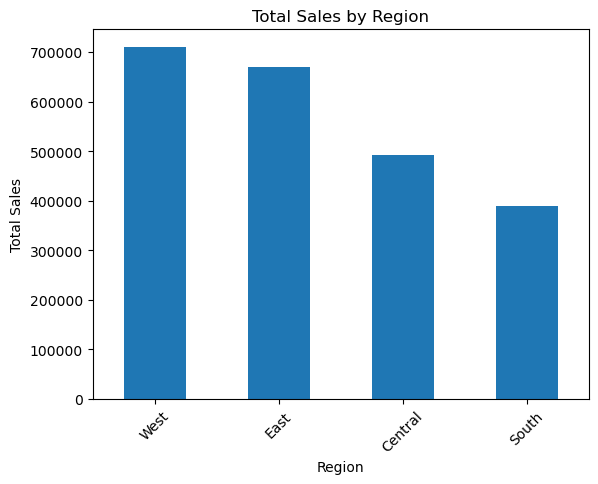

In [35]:
region_sales = (
    df.groupby('Region')['Sales']
    .sum()
    .sort_values(ascending=False)
)

region_sales.plot(kind='bar')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


The West region generates the highest total sales, followed by the East, while the South region contributes the least.  
This indicates strong regional demand differences, suggesting that region-specific marketing and distribution strategies could help improve performance in underperforming regions.


In [36]:
(region_sales / df['Sales'].sum() * 100).round(2)


Region
West       31.40
East       29.60
Central    21.78
South      17.21
Name: Sales, dtype: float64

The West and East regions together contribute more than half of total sales.

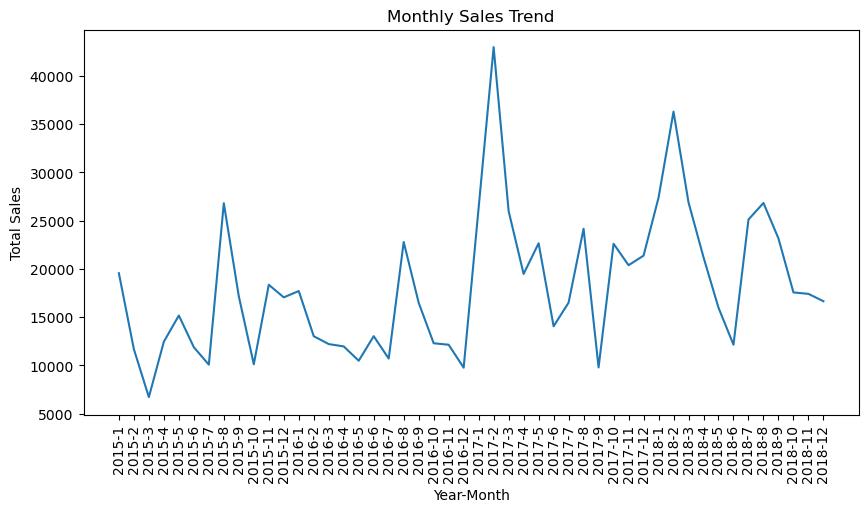

In [37]:
monthly_sales = (
    df_time
    .groupby(['Order_Year', 'Order_Month'])['Sales']
    .sum()
    .reset_index()
)

monthly_sales['Year_Month'] = (
    monthly_sales['Order_Year'].astype(str) + '-' +
    monthly_sales['Order_Month'].astype(str)
)

plt.figure(figsize=(10,5))
plt.plot(monthly_sales['Year_Month'], monthly_sales['Sales'])
plt.xticks(rotation=90)
plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.show()


## 📈 Monthly Sales Trend Analysis

The monthly sales trend shows noticeable fluctuations over time, with several sharp peaks and drops across different months. While sales do not follow a perfectly smooth upward trend, there are repeated periods of high sales activity, indicating seasonality in customer demand.

These fluctuations suggest that sales are influenced by time-based factors such as promotional periods, demand cycles, or external market conditions. Understanding these patterns can help the business plan inventory, staffing, and marketing efforts more effectively during peak periods.


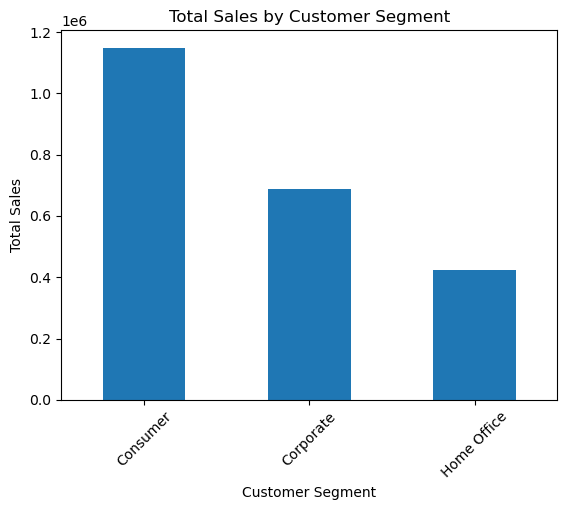

In [38]:
segment_sales = (
    df.groupby('Segment')['Sales']
    .sum()
    .sort_values(ascending=False)
)

segment_sales.plot(kind='bar')
plt.title('Total Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


## 👥 Sales Distribution by Customer Segment

The Consumer segment contributes the highest share of total sales, followed by the Corporate segment, while the Home Office segment generates comparatively lower revenue.

This indicates that individual consumers are the primary revenue drivers for the business. Focusing marketing efforts, product availability, and customer retention strategies on the Consumer segment could lead to higher overall sales. At the same time, there is potential to improve revenue from the Corporate and Home Office segments through targeted offers and customized solutions.


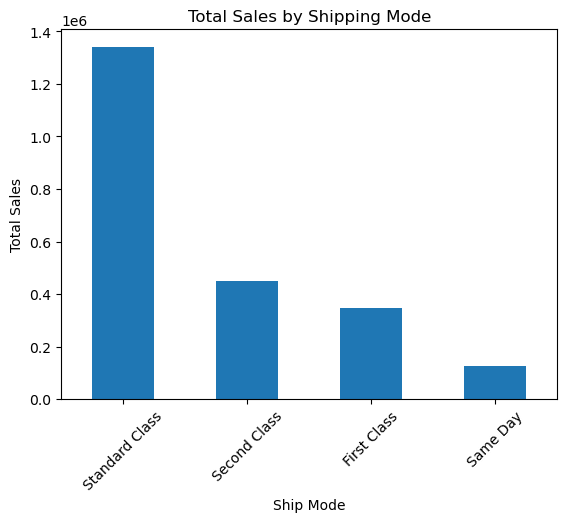

In [40]:
ship_sales = (
    df.groupby('Ship Mode')['Sales']
    .sum()
    .sort_values(ascending=False)
)

ship_sales.plot(kind='bar')
plt.title('Total Sales by Shipping Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


## 🚚 Sales by Shipping Mode

Standard Class accounts for the majority of total sales, significantly outperforming other shipping modes. Second Class and First Class contribute moderately, while Same Day shipping has the lowest share of sales.

This suggests that customers prioritize cost-effective shipping over faster delivery. Standard Class appears to be the most preferred option, likely due to its balance between delivery time and price. Optimizing logistics and cost efficiency for Standard Class shipments can have the highest impact on overall sales, while premium shipping options may require better incentives to increase adoption.


## 📌 Key Business Insights

- Technology category contributes the highest share of total sales, making it the primary revenue driver.
- The top three sub-categories account for nearly 38% of total sales, indicating revenue concentration.
- Consumer segment generates the maximum sales compared to Corporate and Home Office.
- Standard Class shipping dominates sales volume, suggesting customer preference for cost-effective delivery.
- Sales exhibit month-to-month fluctuations, indicating possible seasonality.

## 📊 Business Recommendations

- Focus marketing and inventory efforts on high-performing categories and sub-categories.
- Design targeted campaigns for the Consumer segment to maximize revenue.
- Optimize logistics and costs around Standard Class shipping.
- Investigate seasonal demand patterns to plan promotions and stock in advance.
